In [1]:
#function for parsing csv files in python list
def read_csv(csv_name):
    
    with open(csv_name + '.csv', 'r') as csv:
        csv_data = csv.readlines()
        csv_data_list = []
        for data_row in csv_data:
            data_row = data_row.replace("\n","")
            data = data_row.replace("\ufeff","")
            csv_data_list.append(data_row.split(","))
        
    return (csv_data_list)

#applying read_csv function for all files (files uploaded in jupyter directory)
barometer = read_csv('barometer-last-year')
in_temp = read_csv('indoor-temperature-last-year')
out_temp = read_csv('outside-temperature-last-year')
rainfall = read_csv('rainfall-last-year')

In [2]:
#function for converting datatypes
def conv_type(file_abb):
    for i in range(1, len(file_abb)):
        for j in range(1, len(file_abb[0])):
            file_abb[i][j] = float(file_abb[i][j])
        
    return file_abb

#converting datatype of each function
barometer = conv_type(barometer)

in_temp = conv_type(in_temp)
out_temp = conv_type(out_temp)
rainfall = conv_type(rainfall)

In [3]:
#importing modules
from statistics import mean, stdev as std
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
#converting list in DataFrame
df1 = pd.DataFrame(barometer[1:], columns =['DateTime', 'Baro'])
df2 = pd.DataFrame(in_temp[1:], columns =['DateTime', 'Humidity', 'Temperature', 'Temperature_range (low)', 'Temperature_range (high)'])
df3 = pd.DataFrame(out_temp[1:], columns =['DateTime', 'Temperature', 'Temperature_range (low)', 'Temperature_range (high)'])
df4 = pd.DataFrame(rainfall[1:], columns =['DateTime', 'mm'] ) 

#merging all dataframe in one 
merge1 = pd.merge(df1, df2, on= 'DateTime', how='outer')
merge2 = pd.merge(df3, df4, on='DateTime', how='outer')
merge3 = pd.merge(merge1, merge2, on='DateTime', how='outer')

In [5]:
#function for calculating min, max, mean and standard deviation 
def weather_stat(file_name, file_abb):
    
    #no of rows
    ite_r = len(file_abb)
    #no of columns
    ite_c = len(file_abb[0])
    
    print("Weather Statistics for " + str(file_name)) 
   
    #calculating statistics for each file columnwise
    for i in range(1, ite_c):
        
        #file_col containing only numeric values for calculation
        file_col = [file_abb[j][i] for j in range(1,ite_r)]
        message_B = (file_abb[0][i])
        minimum = min(file_col)
        maximum = max(file_col)
        mean_f = mean(file_col)
        std_f = std(file_col)
        C = "Minimum = " + str(minimum) 
        D = "Maximum = " + str(maximum)
        E = "Mean = " + str(mean_f)
        F = "Standard Deviation = " + str(std_f)
        print(message_B, ":", C,",", D,",", E,",", F)
    
    return ("")

#printing statistics for all weather data
print(weather_stat("Barometer", barometer))
print(weather_stat("Indoor Temperature", in_temp))
print(weather_stat("Outdoor Temperature", out_temp))
print(weather_stat("Rainfall", rainfall))

#verify Statistics
print("WEATHER STATISTICS VERIFICATION")
merge3.describe()

Weather Statistics for Barometer
"Baro" : Minimum = 979.6 , Maximum = 1035.6 , Mean = 1009.9988732394366 , Standard Deviation = 9.869661833899112

Weather Statistics for Indoor Temperature
"Humidity" : Minimum = 37.0 , Maximum = 59.0 , Mean = 48.51977401129943 , Standard Deviation = 5.188885916963873
"Temperature" : Minimum = 18.04 , Maximum = 29.21 , Mean = 21.82788488700565 , Standard Deviation = 2.0583072322969445
"Temperature_range (low)" : Minimum = 14.9 , Maximum = 28.2 , Mean = 20.55593220338983 , Standard Deviation = 2.405124688229041
"Temperature_range (high)" : Minimum = 19.7 , Maximum = 31.1 , Mean = 23.53361581920904 , Standard Deviation = 1.7014657668227484

Weather Statistics for Outdoor Temperature
"Temperature" : Minimum = -1.81 , Maximum = 26.38 , Mean = 11.138876760563381 , Standard Deviation = 5.355041536253681
"Temperature_range (low)" : Minimum = -4.1 , Maximum = 18.7 , Mean = 7.865633802816902 , Standard Deviation = 4.878929889962606
"Temperature_range (high)" : M

,Baro,Humidity,Temperature_x,Temperature_range (low)_x,Temperature_range (high)_x,Temperature_y,Temperature_range (low)_y,Temperature_range (high)_y,mm
count,355.000000,354.000000,354.000000,354.000000,354.000000,355.000000,355.000000,355.000000,353.000000
mean,1009.998873,48.519774,21.827885,20.555932,23.533616,11.138877,7.865634,15.524225,1.548725
std,9.869662,5.188886,2.058307,2.405125,1.701466,5.355042,4.878930,7.034445,3.324599
min,979.600000,37.000000,18.040000,14.900000,19.700000,-1.810000,-4.100000,1.500000,0.000000
25%,1004.850000,44.000000,20.345000,18.725000,22.500000,7.390000,4.350000,10.250000,0.000000
50%,1010.500000,48.000000,21.710000,20.600000,23.200000,10.960000,8.000000,15.100000,0.000000
75%,1016.050000,52.000000,22.710000,21.900000,24.100000,15.050000,12.050000,19.850000,1.100000
max,1035.600000,59.000000,29.210000,28.200000,31.100000,26.380000,18.700000,38.500000,23.200000


Correalation Heatmap for all Weather Data


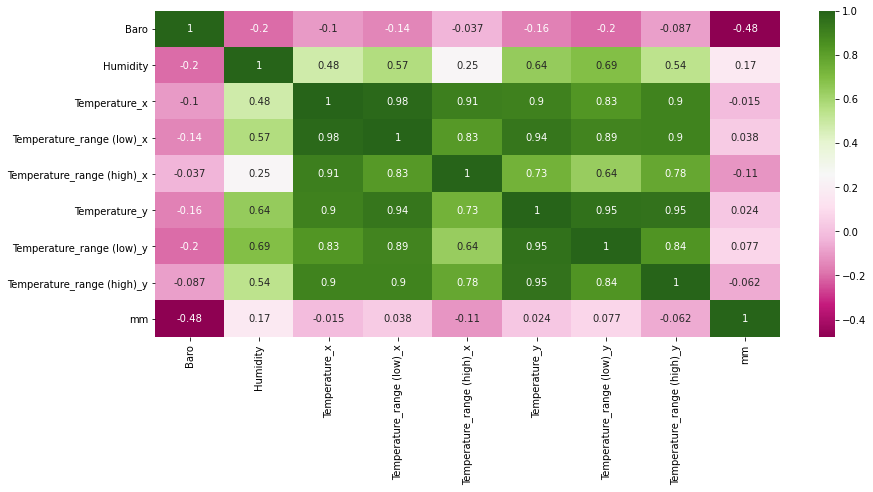

The Correlogram between Weather Data


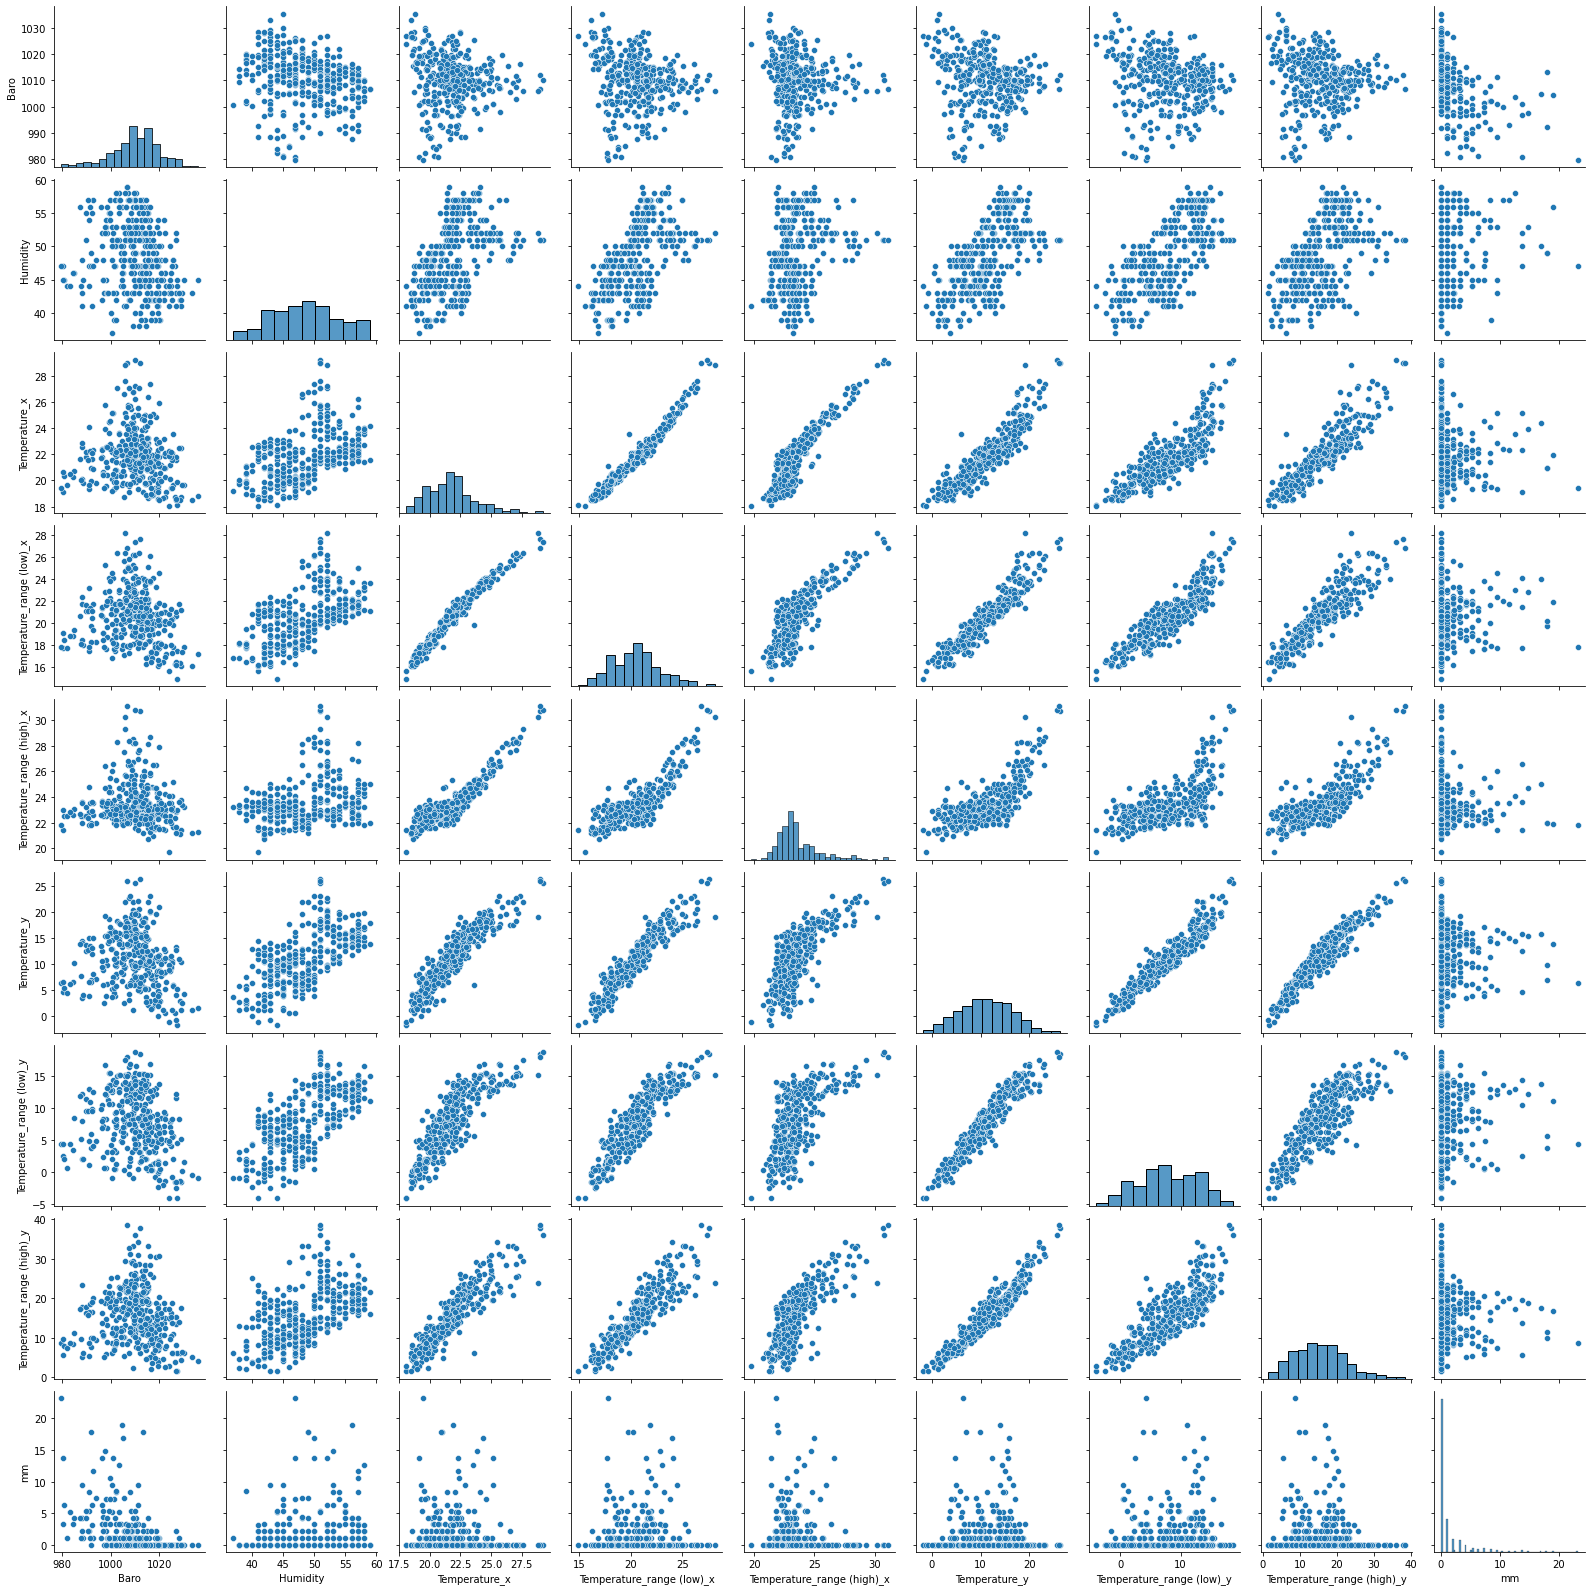

In [7]:
# Takes some time to run (second plot)
#plotting corealation between all weather data
print("Correalation Heatmap for all Weather Data")
plt.figure(figsize=(14, 6))
dataplot = sb.heatmap(merge3.corr(), cmap="PiYG", annot=True)
plt.show()

#plotting correlogram (takes some time to run)
print("The Correlogram between Weather Data")
sb.pairplot(merge3, kind="scatter")
plt.show()

In [9]:
# CODE FOR TASK 2 (not related to task 1)
#grouping data in monthly and seasonal values

data1 = pd.read_csv('barometer-last-year.csv')
data2 = pd.read_csv('indoor-temperature-last-year.csv')
data3 = pd.read_csv('outside-temperature-last-year.csv')
data4 = pd.read_csv('rainfall-last-year.csv')
merge1 = pd.merge(data1, data2, on='DateTime', how='outer')
merge2 = pd.merge(data3, data4, on='DateTime', how='outer')
df = pd.merge(merge1, merge2, on='DateTime', how='outer')

import datetime

df["Month"] = pd.DatetimeIndex(df["DateTime"]).month
df["Season"] = df["Month"].replace({3: "Spring", 4: "Spring", 5: " Spring", 6: "Summer", 7: "Summer", 8: "Summer", 9: "Autumn", 10: "Autumn", 11: "Autumn", 12: "Winter", 1: "Winter", 2: "Winter"})

month = df.groupby("Month")
season = df.groupby("Season")

#replace column name for each group of data eg. "Baro", "Humidity", "mm" etc.
monthlydata = month["Baro"].describe()
seasonlydata = season["Baro"].describe()

#uncomment below syntax one by one to see output
monthlydata
# seasonlydata

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,31.0,1015.422581,9.825942,998.1,1005.350,1018.30,1023.200,1030.2
2,28.0,1005.757143,12.848618,980.9,996.875,1009.25,1016.525,1021.7
3,30.0,1006.503333,11.363356,980.8,1000.650,1008.75,1014.050,1025.3
4,30.0,1015.373333,7.881665,992.4,1011.700,1015.35,1020.275,1028.6
5,31.0,1008.864516,7.792113,988.2,1005.400,1010.10,1014.450,1019.7
6,30.0,1006.083333,7.415179,989.9,1003.675,1007.00,1009.925,1019.9
7,31.0,1006.745161,6.168784,997.7,1000.350,1008.00,1012.300,1016.2
8,22.0,1009.113636,3.384741,1001.9,1007.050,1009.75,1010.525,1015.2
9,30.0,1005.846667,7.962400,987.4,1003.425,1007.45,1011.925,1015.2
